### Problem Statement

Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from Kaggle.<br> This data set provides information on the Titanic passengers and can be used to
predict whether a passenger survived or not.

In [1]:
#Loading Data and modules

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)

### Data Exploration

In [3]:
#Quick examination of data loaded

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Examine the data

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Observation:
>There is a good amount of data missing for <b>'Age'</b><br>
> We have to treat the categorical variable <b>Age</B> while preparing data.


In [5]:
titanic.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


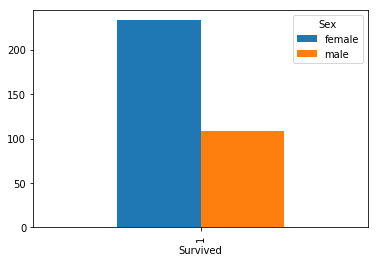

In [6]:
pd.crosstab(titanic['Survived'][titanic['Survived']==1],titanic['Sex']).plot(kind='bar')
plt.show()

#### Observations:
In General, there are higher percentage of survivors for <b>Class=1 than Class=2. Class=3 </b> has least percentage of survivors.<br>
Female survivors outnumber Male survivors by a huge margin.


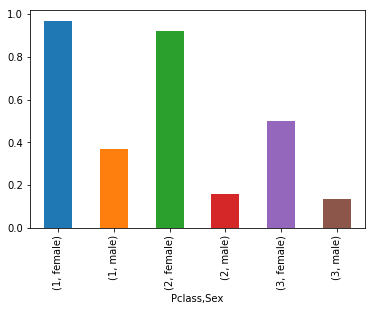

In [7]:
# Understanding under what parameters female survivors are more than male
#Check by Class
group_class_sex = titanic.groupby(['Pclass','Sex']).mean()
group_class_sex['Survived'].plot.bar()
plt.show()

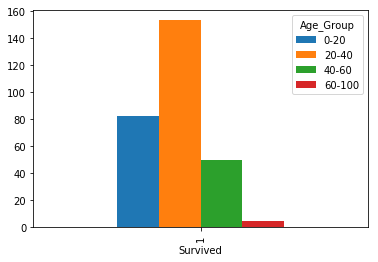

In [8]:
#Check by Age Grops
#Create bins for Age groups

titanic['Age_Group'] = pd.cut(titanic['Age'], [0, 20, 40,60,100], labels=['0-20', '20-40', '40-60','60-100'])

pd.crosstab(titanic['Survived'][titanic['Survived']==1],titanic['Age_Group']).plot(kind='bar')
plt.show()

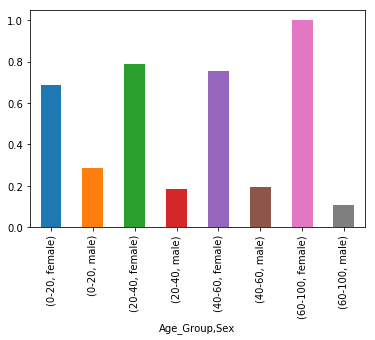

In [9]:
#Check survivors by Age-by Gender

group_age_sex = titanic.groupby(['Age_Group','Sex']).mean()
group_age_sex['Survived'].plot.bar()
plt.show()

#### Observations:
>There are more survivors for low age-groups, which can be because of preference given to children during evacuation/rescue, Higher endurance of young people.<br>
>In every class, female survivors outnumber male survivors<br>
>Female survivors outnumber male survivors in all age agroups, bt more so in age groups <b>60-70

### Data Preparation

In [10]:
#Check for Missing Data
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Age_Group      714
dtype: int64

#### Observations
>Some of the records have missing values for 'Age'. As we observed that age is a very important factor in determining the probability of survival, we should drop the missing value records<br>
>Cabin has many missing values. So, we will have to drop this field, as we can't impute values for a variable that's missing about 70% data missing .


In [11]:
titanic = titanic.drop(columns=['Cabin'])
titanic=titanic.dropna()
titanic.count()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
Age_Group      712
dtype: int64

In [12]:
# Drop PassengerId, Name, Ticket, Fare, Embarked

titanic=titanic.drop(['Name','PassengerId','Ticket','Fare','Embarked'], axis=1)

In [13]:
# Converting categorical variable 'Age'

gender=sklearn.preprocessing.LabelEncoder()
titanic['Gender']=gender.fit_transform(titanic['Sex'])

In [14]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Age_Group,Gender
0,0,3,male,22.0,1,0,20-40,1
1,1,1,female,38.0,1,0,20-40,0
2,1,3,female,26.0,0,0,20-40,0
3,1,1,female,35.0,1,0,20-40,0
4,0,3,male,35.0,0,0,20-40,1


In [15]:
# Drop Column Sex as we have created Gender variable
titanic=titanic.drop(['Sex'], axis=1)

In [16]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Age_Group,Gender
0,0,3,22.0,1,0,20-40,1
1,1,1,38.0,1,0,20-40,0
2,1,3,26.0,0,0,20-40,0
3,1,1,35.0,1,0,20-40,0
4,0,3,35.0,0,0,20-40,1


#### Comment:
Male=1, Female=0

In [17]:
#Determine X (independent variables) and y(target variables)

x_col=['Pclass','Age','SibSp','Parch','Gender']
X=titanic[x_col]
y=titanic['Survived']


In [18]:
# Split the dataset into Training and Test

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=1)

### Building Decision Tree Classifier

In [19]:
### Initiate Decision Tree Classifier
clf_dt=tree.DecisionTreeClassifier(max_depth=10)

clf_dt.fit (X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
# Apply the model built on test dataset and find the core
test_score=clf_dt.score (X_test, y_test)
print('Score = {}'.format(test_score))

Score = 0.7523364485981309


### Validation the Model

We will use ShuffleSplit to optimze the accuracy here

In [21]:
from sklearn.model_selection import ShuffleSplit
#help(ShuffleSplit)
shuffle_validator = ShuffleSplit(n_splits=20,  test_size=0.2, random_state=1)
def test_classifier(clf):
    scores = cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [22]:
test_classifier(clf_dt)

Accuracy: 0.7871 (+/- 0.04)
